In [2]:
import os
import sys
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as tick
import matplotlib.patches as mpatches
import warnings
from matplotlib import cm
warnings.filterwarnings('ignore')

Read in final metadata file

In [3]:
metadata = pd.read_csv("/home/sanjavickovic/data/host-microbiome_data/st_data/Metadata_final_with_mouse_info.csv", sep = "\t", index_col = 0)

In [4]:
metadata['experiment'] = [i.split("_")[0] for i in metadata['sample']]

# Plots UMIs per spot

Text(0.5, 0, 'MROIs')

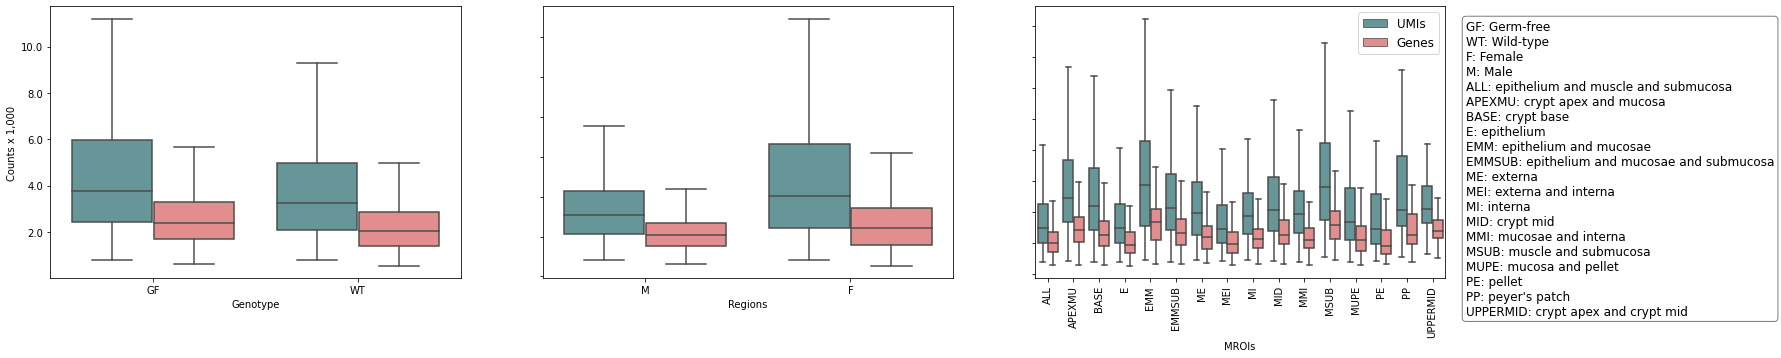

In [4]:
'Plots violin plots'
fig, axes = plt.subplots(1,3,figsize=(25,5))

data = pd.melt(metadata, ["Genotype"])[pd.melt(metadata, ["Genotype"]).variable.isin(['UMIs', 'Genes'])]
x = 'Genotype'
y = 'value'
hue = 'variable'


sns.boxplot(x=x,
            y=y,
            data=data,
            hue = hue,
            order = ['GF', 'WT'],
            palette = ['cadetblue','lightcoral',], 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[0])
axes[0].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))
axes[0].legend_.remove()
# Legend
# handles, labels = axes[1].get_legend_handles_labels()
# labels = [i+": "+j for i,j in sorted(zip(['D', 'M', 'P'], ['Distal', 'Middle', 'Proximal']))]
# for i, color in enumerate(['gray','lightgray','white']):
#     handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(meta_5[x])[i]], edgecolor='k'))
# axes[1].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(0.75, -0.3),
#           fancybox=True, shadow=True, ncol=1, fontsize=12)

data = pd.melt(metadata, ["Sex"])[pd.melt(metadata, ["Sex"]).variable.isin(['UMIs', 'Genes'])]
x = 'Sex'
y = 'value'
hue = 'variable'

sns.boxplot(x=x,
            y=y,
            data=data, 
            hue = hue,
            order = ['M', 'F'],
            palette = [ 'cadetblue','lightcoral',], 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[1])
axes[1].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))
axes[1].legend_.remove()
# Legend
# handles, labels = axes[2].get_legend_handles_labels()
# labels = [i+": "+j for i,j in sorted(zip(['M', 'F'], ['Male', 'Female']))]
# for i, color in enumerate(['cadetblue','lightcoral']):
#     handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(meta_5[x])[i]], edgecolor='k'))
# axes[2].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(0.75, -0.3),
#           fancybox=True, shadow=True, ncol=1, fontsize=12)

data = pd.melt(metadata, ["short_annotations"])[pd.melt(metadata, ["short_annotations"]).variable.isin(['UMIs', 'Genes'])]
x = 'short_annotations'
y = 'value'
hue = 'variable'

sns.boxplot(x=x,
            y=y,
            hue = hue,
            data=data, 
            palette = [ 'cadetblue','lightcoral',],
            #palette = sns.color_palette("hls", len(np.unique(meta_5[x]))), 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[2])

axes[2].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))
axes[2].set_xticklabels(rotation='vertical', labels = np.unique(data[x]))

# # Legend
# handles, labels = axes[3].get_legend_handles_labels()
# labels = [i+": "+j for i,j in sorted(zip(list(abbreviate_anns_dict.values()), list(abbreviate_anns_dict.keys())))]
# for i, color in enumerate(sns.color_palette("hls", len(np.unique(meta_5[x])))):
#     handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(meta_5[x])[i]], edgecolor='k'))
# axes[3].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(1.75, -0.3),
#           fancybox=True, shadow=True, ncol=1, fontsize=12)

# Legend
handles, labels = axes[2].get_legend_handles_labels()
labels = ["UMIs", "Genes"]
for i, color in enumerate(['cadetblue','lightcoral']):
    handles.append(mpatches.Patch(facecolor=color, label=labels[i], edgecolor='k'))
axes[2].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=False, ncol=1, fontsize=12)
labels_region = '\n'.join([i+": "+j for i,j in sorted(zip(['GF', 'WT'], ['Germ-free', 'Wild-type', ]))])
labels_sex =  '\n'+'\n'.join([i+": "+j for i,j in sorted(zip(['M', 'F'], ['Male', 'Female']))])
labels_mrois = '\n'+'\n'.join(np.unique([j+": "+i for i,j in zip(metadata['annotation'], metadata['short_annotations'])]).tolist())

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
axes[2].text(1.05, 0.95, labels_region+labels_sex+labels_mrois, transform=axes[2].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# set x and y axis
axes[0].set_ylabel('Counts x 1,000')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[1].set(yticklabels = [])
axes[2].set(yticklabels = [])
axes[1].set_xlabel('Regions')
axes[2].set_xlabel('MROIs')

# plt.savefig("../../figures/UMI_Genes_ST_QC.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200)

Text(0.5, 1.0, 'ST: Summary')

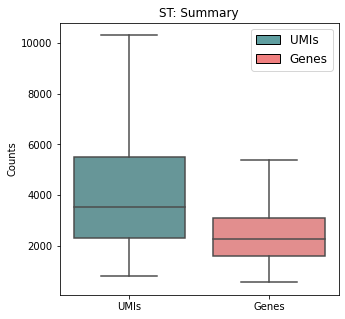

In [5]:
'Plots violin plots'
fig, axes = plt.subplots(1,1,figsize=(5,5))

data = metadata
y = 'UMIs'
x = 'Genes'

sns.boxplot(data=data,
            order = ['UMIs', 'Genes'],
            palette = ['cadetblue','lightcoral',],
            showfliers=False,
            ax = axes)

# Legend
handles, labels = axes.get_legend_handles_labels()
labels = ["UMIs", "Genes"]
for i, color in enumerate(['cadetblue','lightcoral']):
    handles.append(mpatches.Patch(facecolor=color, label=labels[i], edgecolor='k'))
axes.legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=False, ncol=1, fontsize=12)

# set x and y axis
axes.set_ylabel('Counts')
axes.set_xlabel('')
axes.set_title('ST: Summary')
# plt.savefig("../../figures/UMI_Genes_ST_QC.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200)

# Plots UMIs only per spot

Text(0.5, 0, 'MROIs')

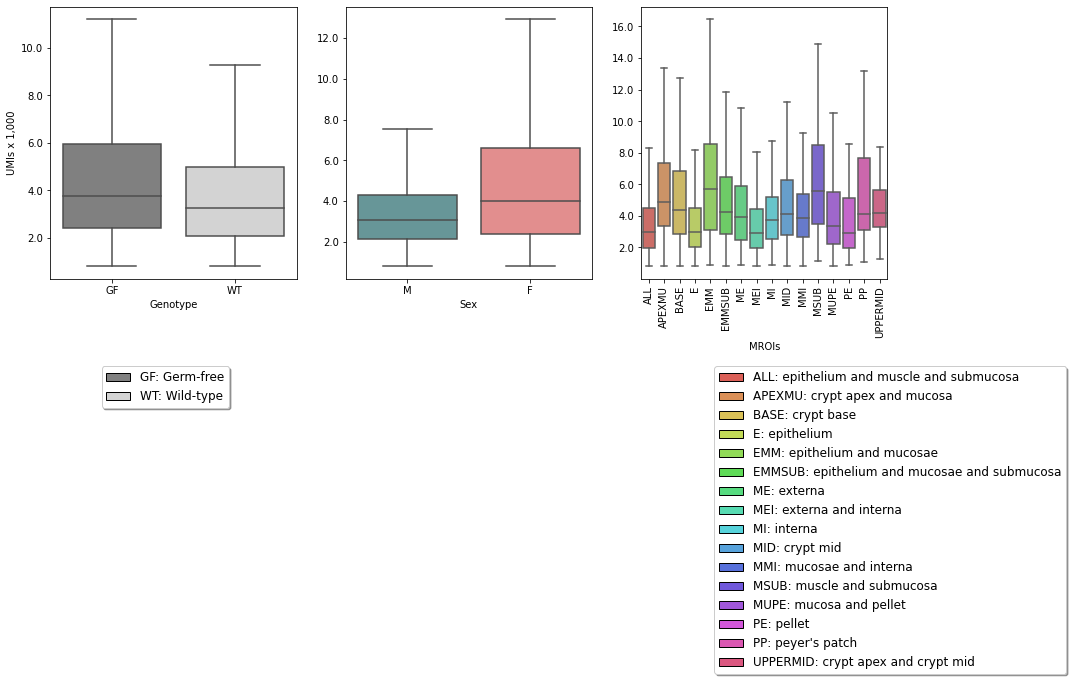

In [6]:
'Plots violin plots'
fig, axes = plt.subplots(1,3,figsize=(15,5))

x = 'Genotype'
y = 'UMIs'

sns.boxplot(x=x,
            y=y,
            data=data, 
            order = ['GF', 'WT'],
            palette = ['gray','lightgray'],
            showfliers=False,
            #cut=0.1,
            #alpha=.25,
            ax = axes[0])
axes[0].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))

# Legend
handles, labels = axes[0].get_legend_handles_labels()
labels = [i+": "+j for i,j in sorted(zip(['GF', 'WT'], ['Germ-free', 'Wild-type']))]
for i, color in enumerate(['gray','lightgray']):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[0].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(0.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)

x = 'Sex'
y = 'UMIs'

sns.boxplot(x=x,
            y=y,
            data=data, 
            order = ['M', 'F'],
            palette = [ 'cadetblue','lightcoral',], 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[1])
axes[1].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))
# Legend
handles, labels = axes[1].get_legend_handles_labels()
labels = [i+": "+j for i,j in sorted(zip(['M', 'F'], ['Male', 'Female']))]
for i, color in enumerate(['cadetblue','lightcoral']):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[2].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(0.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)


x = 'short_annotations'
y = 'UMIs'

sns.boxplot(x=x,
            y=y,
            data=data, 
            palette = sns.color_palette("hls", len(np.unique(data[x]))), 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[2])

axes[2].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))
axes[2].set_xticklabels(rotation='vertical', labels = np.unique(data[x]))

# Legend
handles, labels = axes[2].get_legend_handles_labels()
labels = np.unique([j+": "+i for i,j in zip(metadata['annotation'], metadata['short_annotations'])]).tolist()
for i, color in enumerate(sns.color_palette("hls", len(np.unique(data[x])))):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[2].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(1.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)

# set x and y axis
axes[0].set_ylabel('UMIs x 1,000')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[2].set_xlabel('MROIs')

# plt.savefig("../../figures/UMI_ST_QC.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200)

# Plots Genes only per spot

Text(0.5, 0, 'MROIs')

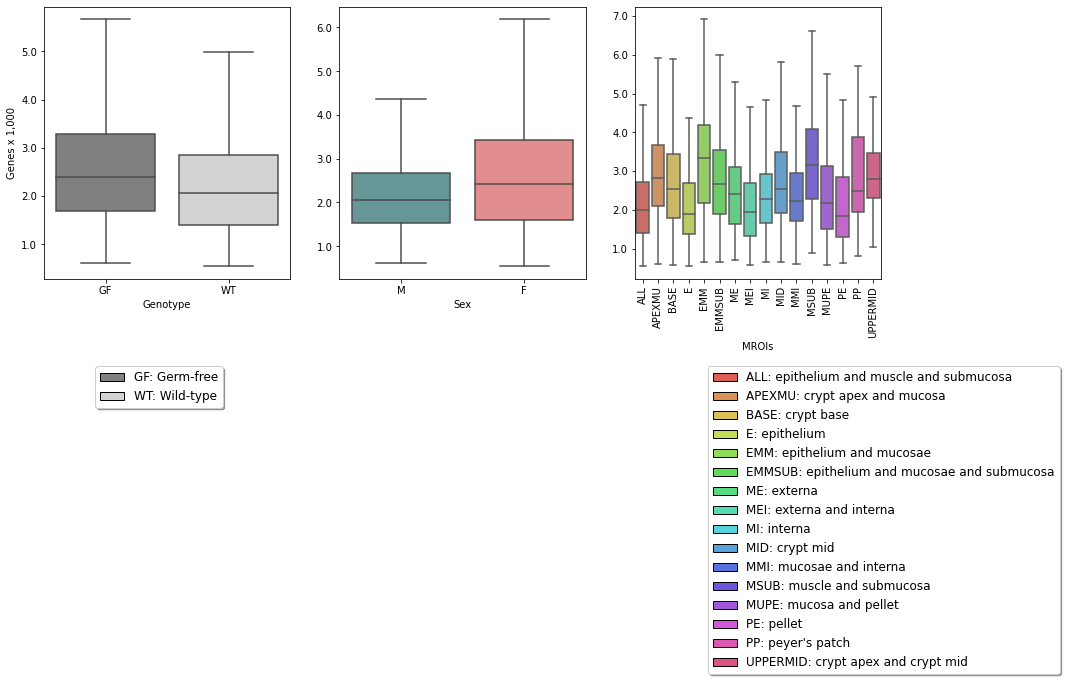

In [7]:
'Plots violin plots'
fig, axes = plt.subplots(1,3,figsize=(15,5))

x = 'Genotype'
y = 'Genes'

sns.boxplot(x=x,
            y=y,
            data=data, 
            order = ['GF', 'WT'],
            palette = ['gray','lightgray'],
            showfliers=False,
            #cut=0.1,
            #alpha=.25,
            ax = axes[0])
axes[0].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))

# Legend
handles, labels = axes[0].get_legend_handles_labels()
labels = [i+": "+j for i,j in sorted(zip(['GF', 'WT'], ['Germ-free', 'Wild-type']))]
for i, color in enumerate(['gray','lightgray']):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[0].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(0.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)

x = 'Sex'
y = 'Genes'

sns.boxplot(x=x,
            y=y,
            data=data, 
            order = ['M', 'F'],
            palette = [ 'cadetblue','lightcoral',], 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[1])
axes[1].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))
# Legend
handles, labels = axes[1].get_legend_handles_labels()
labels = [i+": "+j for i,j in sorted(zip(['M', 'F'], ['Male', 'Female']))]
for i, color in enumerate(['cadetblue','lightcoral']):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[2].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(0.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)


x = 'short_annotations'
y = 'Genes'

sns.boxplot(x=x,
            y=y,
            data=data, 
            palette = sns.color_palette("hls", len(np.unique(data[x]))), 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[2])

axes[2].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(float(x/1000), ',')))
axes[2].set_xticklabels(rotation='vertical', labels = np.unique(data[x]))

# Legend
handles, labels = axes[2].get_legend_handles_labels()
labels = np.unique([j+": "+i for i,j in zip(metadata['annotation'], metadata['short_annotations'])]).tolist()
for i, color in enumerate(sns.color_palette("hls", len(np.unique(data[x])))):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[2].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(1.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)

# set x and y axis
axes[0].set_ylabel('Genes x 1,000')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[2].set_xlabel('MROIs')

# plt.savefig("../../figures/UMI_ST_QC.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200)

# Plots spots and sections in dataset

Text(0.5, 0, 'MROIs')

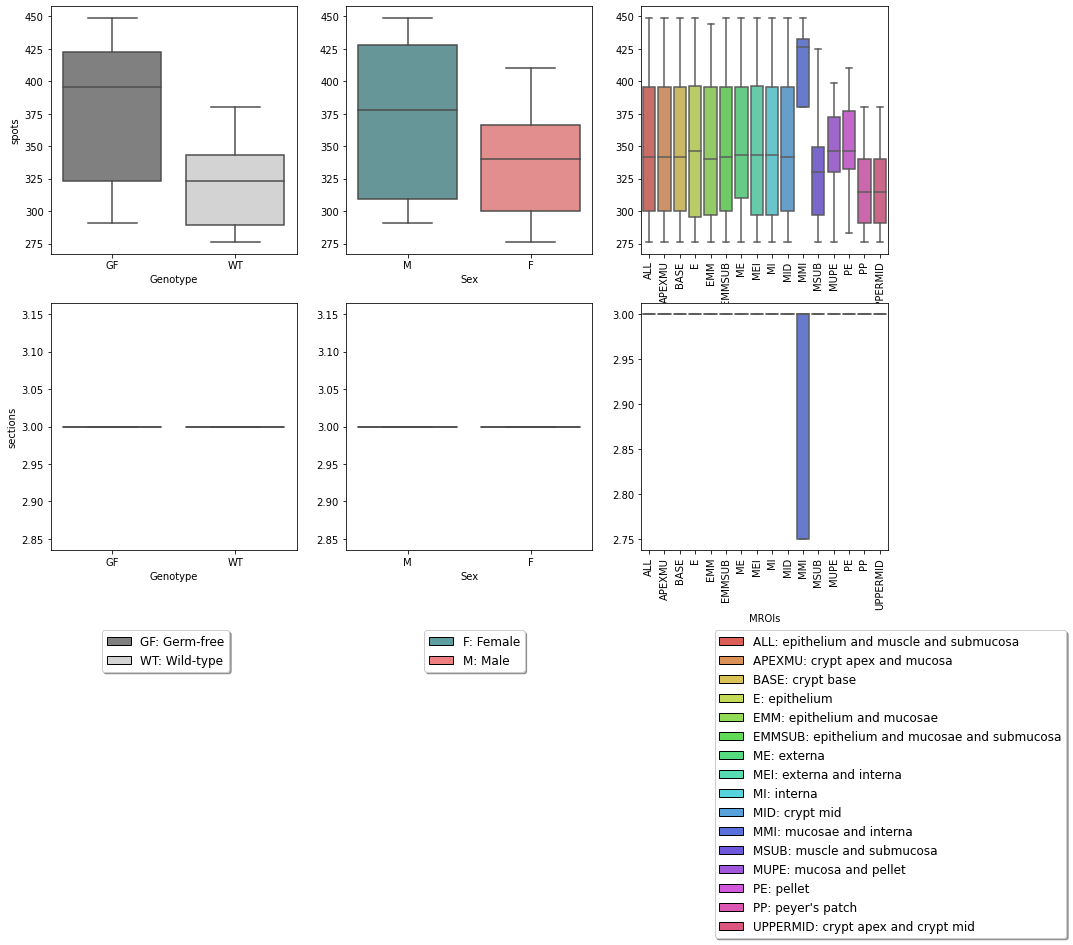

In [8]:
'Plots violin plots'
fig, axes = plt.subplots(ncols = 3, nrows = 2,figsize=(15,10))

data = metadata.groupby(["sample", "Genotype"]).mean()[['sections', 'spots']].reset_index()
x = 'Genotype'
y = 'spots'

sns.boxplot(x=x,
            y=y,
            data=data, 
            order = ['GF', 'WT', ],
            palette = ['gray','lightgray','white'],
            showfliers=False,
            #cut=0.1,
            #alpha=.25,
            ax = axes[0,0])

data = metadata.groupby(["sample", "Sex"]).mean()[['sections', 'spots']].reset_index()
x = 'Sex'
y = 'spots'

sns.boxplot(x=x,
            y=y,
            data=data, 
            order = ['M', 'F'],
            palette = [ 'cadetblue','lightcoral',], 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[0,1])

data = metadata.groupby(["sample", "short_annotations"]).mean()[['sections', 'spots']].reset_index()
x = 'short_annotations'
y = 'spots'

sns.boxplot(x=x,
            y=y,
            data=data, 
            palette = sns.color_palette("hls", len(np.unique(data[x]))), 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[0,2])


axes[0,2].set_xticklabels(rotation='vertical', labels = np.unique(data[x]))

# set x and y axis
axes[0,0].set_ylabel('spots')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,2].set_xlabel('MROIs')


data = metadata.groupby(["sample", "Genotype"]).mean()[['sections', 'spots']].reset_index()
x = 'Genotype'
y = 'sections'

sns.boxplot(x=x,
            y=y,
            data=data, 
            order = ['GF', 'WT',],
            palette = ['gray','lightgray',],
            showfliers=False,
            #cut=0.1,
            #alpha=.25,
            ax = axes[1,0])

# Legend
handles, labels = axes[1,0].get_legend_handles_labels()
labels = [i+": "+j for i,j in sorted(zip(['GF', 'WT',], ['Germ-free', 'Wild-type']))]
for i, color in enumerate(['gray','lightgray']):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[1,0].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(0.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)

data = metadata.groupby(["sample", "Sex"]).mean()[['sections', 'spots']].reset_index()
x = 'Sex'
y = 'sections'

sns.boxplot(x=x,
            y=y,
            data=data, 
            order = ['M', 'F'],
            palette = [ 'cadetblue','lightcoral',], 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[1,1])

# Legend
handles, labels = axes[1,1].get_legend_handles_labels()
labels = [i+": "+j for i,j in sorted(zip(['M', 'F'], ['Male', 'Female']))]
for i, color in enumerate(['cadetblue','lightcoral']):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[1,1].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(0.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)

data = metadata.groupby(["sample", "short_annotations"]).mean()[['sections', 'spots']].reset_index()
x = 'short_annotations'
y = 'sections'

sns.boxplot(x=x,
            y=y,
            data=data, 
            palette = sns.color_palette("hls", len(np.unique(data[x]))), 
            #cut=0.1,
            #alpha=.25,
            showfliers=False,
            ax = axes[1,2])

axes[1,2].set_xticklabels(rotation='vertical', labels = np.unique(data[x]))

# Legend
handles, labels = axes[1,2].get_legend_handles_labels()
labels = np.unique([j+": "+i for i,j in zip(metadata['annotation'], metadata['short_annotations'])]).tolist()
for i, color in enumerate(sns.color_palette("hls", len(np.unique(data[x])))):
    handles.append(mpatches.Patch(facecolor=color, label=labels[labels == np.unique(data[x])[i]], edgecolor='k'))
axes[1,2].legend(handles = handles, labels = labels, loc='upper right', bbox_to_anchor=(1.75, -0.3),
          fancybox=True, shadow=True, ncol=1, fontsize=12)

# set x and y axis
axes[1,0].set_ylabel('sections')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,2].set_xlabel('MROIs')


# plt.savefig("../../figures/UMI_ST_QC.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200)

## Spots per array

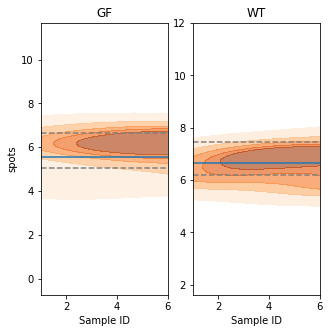

In [9]:
hue = "Genotype"
y = 'spots'
x = 'experiment'
group = "Sex"

data_m = metadata[[x,hue,y]].drop_duplicates()

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize=(5,5))
dfs = []

for i, region in enumerate(['GF', 'WT']):

    #print(i,j)
    data = data_m[(data_m[hue] == region)]
    data['spots'] = 100*data.spots/sum(data.spots)
    data[x] = [i[0]+1 for i in enumerate(data[x].astype('category'))]
    #print(np.unique(data[x]))
    #print(max(np.unique(data[x])))
    #print(data)
    sns.kdeplot(
        data=data,
        x=x,
        y=y,
        #hue = hue,
        levels=6,
        fill=True,
        alpha=0.6,
        cut=10,
        cmap = 'Oranges',
        ax = axes[i])
    
    dfs.append(data)

    if (i == 0):
        axes[i].set_ylabel(y)
        #axes[i].set_yticklabels(labels = [0,500,1000, 1500, 2000, 2500])
    else:
        axes[i].set_ylabel('')
#         axes[i].set_yticklabels(labels = [])

    axes[i].set_title(region)
    axes[i].axhline(np.mean(data[y]), 0, 1)
    axes[i].set_xlim(1,6)
    #axes[i].set_ylim(0, 600)
    axes[i].set_xlabel('Sample ID')
    
datas = pd.concat(dfs)
for i, region in enumerate(['GF', 'WT']):

    data = datas[(datas[hue] == region)][y]

    axes[i].axhline(np.median(data)+np.std(data), 0, 1, linestyle='dashed', c = "gray", )
    axes[i].axhline(np.median(data)-np.std(data), 0, 1, linestyle='dashed', c = "gray", )

## Sections per array

In [10]:
# hue = "Genotype"
# y = 'sections'
# x = 'experiment'
# group = "Sex"

# data_m =  metadata.groupby([x, hue,'sample','sections'], as_index=False).count()[[x,hue,'sample','sections']]

# fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize=(5,5))

# for i, region in enumerate(['GF', 'WT']):

#     #print(i,j)
#     data = data_m[(data_m[hue] == region)]
#     data[x] = [i[0]+1 for i in enumerate(data[x].astype('category'))]
#     #print(np.unique(data[x]))
#     #print(max(np.unique(data[x])))
#     #print(data)
#     sns.kdeplot(
#         data=data,
#         x=x,
#         y=y,
#         #hue = hue,
#         levels=2,
#         fill=True,
#         alpha=0.6,
#         cut=0,
#         cmap = 'Reds',
#         ax = axes[i])

#     if (i == 0):
#         axes[i].set_ylabel(y)
#         #axes[i].set_yticklabels(labels = [0,500,1000, 1500, 2000, 2500])
#     else:
#         axes[i].set_ylabel('')
#         axes[i].set_yticklabels(labels = [])

#     axes[i].set_title(region)
#     axes[i].axhline(np.mean(data[y]), 0, 1)
#     axes[i].set_xlim(0,6)
#     axes[i].set_ylim(0,6)
#     axes[i].axhline(np.mean(data_m[y]), 0, 1, linestyle='dashed', c = "gray", )


## Spots per annotation region

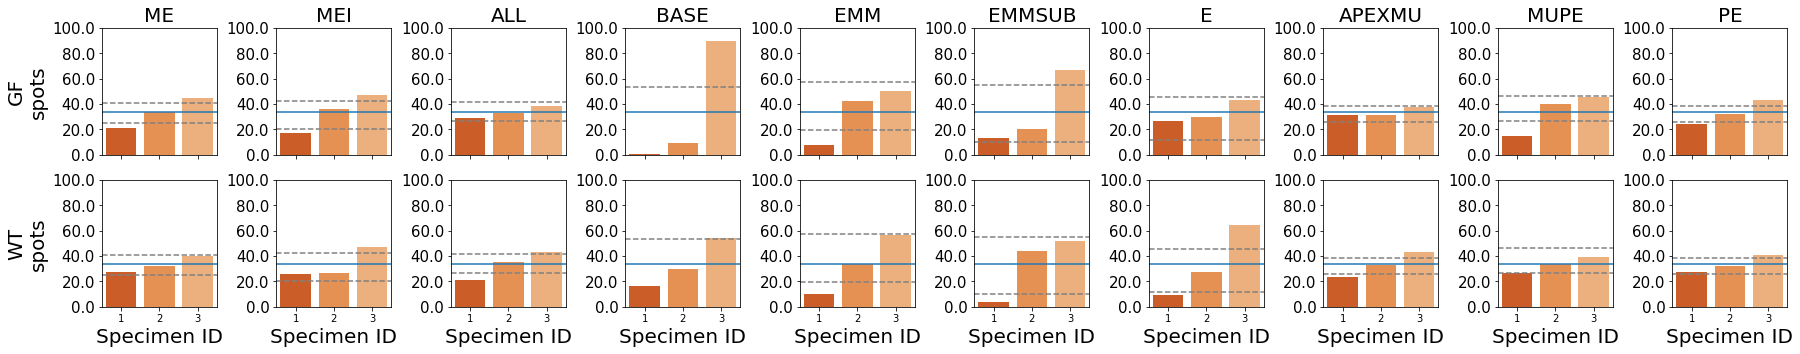

In [64]:
group = "short_annotations"
x = 'experiment'
y = 'spots'
hue = "Genotype"
data_m = metadata.groupby(["sample","Genotype",'experiment',"short_annotations"]).count().reset_index()[["spots", "Genotype",'experiment',"short_annotations"]]
data_m = data_m.groupby(["Genotype",'experiment',"short_annotations"]).sum().reset_index()[[group, x, y, hue,]]
#data_sd = data_m.groupby(["Genotype",'experiment',"short_annotations"]).std().reset_index()[[group, x, y, hue,]]

regions = []
for k, age in enumerate(np.unique(data_m[group])):
        data = data_m.groupby(['short_annotations']).count().loc[age]
        if data[0] >= 6:
            regions.append(age)
            
# define intersting caterogires and their order 
order_categories = ['ME', 'MEI', 'ALL','BASE', 'EMM', 'EMMSUB','E','APEXMU','MUPE','PE'  ]
dfs = []

fig, axes = plt.subplots(ncols = len(order_categories), nrows = len(np.unique(data_m[hue])), figsize=(25,5))

for i, region in enumerate(['GF', 'WT']):
    for j, age in enumerate(order_categories):
        #print(i,j)
        data = data_m[(data_m[group] == age)&(data_m[hue] == region)]
        data['spots'] = 100*data.spots/sum(data.spots)
        data = data.sort_values('spots')
        #print(data)
        
        data[x] = [i[0]+1 for i in enumerate(data[x].astype('category'))]
        #print(data)
        
        if len(data) < 3:
            continue
            
        dfs.append(data)
        #print(np.unique(data[x]))
        #print(max(np.unique(data[x])))

        sns.barplot(
            data=data,
            x=x,
            y=y,
            #hue = hue,
#             levels=6,
#             fill=True,
#             alpha=0.6,
#             cut=0,
#             cmap = 'Oranges',
            ax = axes[i,j],
            palette=[cm.get_cmap(plt.get_cmap('tab20c'))(4),cm.get_cmap(plt.get_cmap('tab20c'))(5),cm.get_cmap(plt.get_cmap('tab20c'))(6)]
        )
        if (j == 0):
            axes[i,j].set_ylabel(region+'\n'+y, fontsize = 20)
            #axes[i,j].set_yticklabels(labels = [0,500,1000, 1500, 2000, 2500])
        else:
            axes[i,j].set_ylabel('')
            #axes[i,j].set_yticklabels(labels = [])
        
        if (i == 0):
            axes[i,j].set_title(age, fontsize = 20)
            axes[i,j].set_xlabel('')
            axes[i,j].set_xticklabels(labels = [])
        else:
            if (i == 1):
                axes[i,j].set_xlabel('Specimen ID', fontsize = 20)
            else:
                axes[i,j].set_xticklabels(labels = [])
                axes[i,j].set_xlabel('')

        #axes[i,j].set_xlabel('Mouse ID')
        #axes[i,j].set_title(age)
        
        
        #axes[i,j].set_xlim(0, 6)
        #axes[i,j].set_ylim(0, 200)
        axes[i,j].axhline(np.mean(data[y]), 0, 1)
        #axes[i,j].axvline(np.mean(data[x]), 0, 1)
        
        #axes[i,j].set_xlim(0,3)
        #axes[i,j].set_xticklabels(range(0,4), fontsize = 15)
        axes[i,j].set_ylim(0,100)
        axes[i,j].set_yticklabels(axes[i,j].get_yticks(), fontsize = 15)

datas = pd.concat(dfs)
for i, region in enumerate(['GF', 'WT']):
    for j, age in enumerate(order_categories):
        data = datas[(datas[group] == age)][y]
        
        axes[i,j].axhline(np.median(data)+np.std(data), 0, 1, linestyle='dashed', c = "gray", )
        axes[i,j].axhline(np.median(data)-np.std(data), 0, 1, linestyle='dashed', c = "gray", )
        
fig.tight_layout(pad=1.0)

plt.savefig("../../output/figures/Spots_per_aar_and_mouse_QC.pdf", transparent=True, bbox_inches = 'tight',
   pad_inches = 0, dpi=1200)
    

(0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0)

In [47]:
data

36    24.456522
24    32.408467
10    43.135011
51    27.586207
82    31.896552
66    40.517241
Name: spots, dtype: float64

Description over the whole data: section, spots, cells and animals per condition

sections per condition and per mouse... 20.0
spots per condition and per mouse... 2208.2
cell_count per condition and per mouse... 32546.4
Mice per condition... 3.0


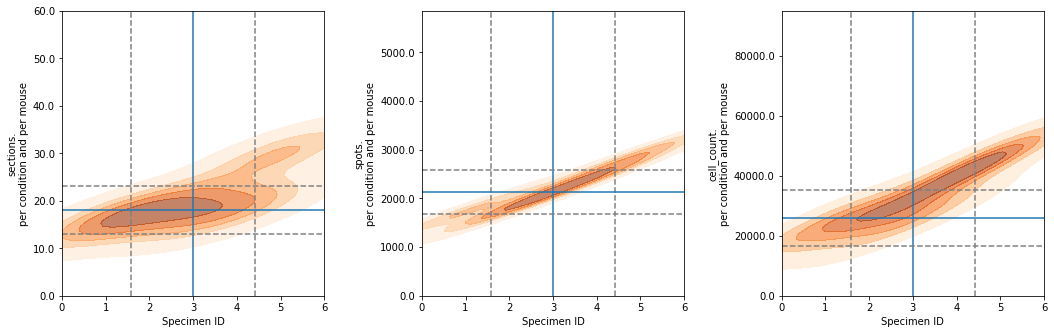

In [6]:
fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5))
fig.tight_layout(pad=4.0)

for i, group in enumerate([ "sections", "spots", "cell_count"]):
    
    if group == "cell_count":
        data = metadata.groupby(["Sex",'Genotype','Specimen_ID']).sum().reset_index()[["cell_count", 'Specimen_ID']]
        data.Specimen_ID = data.Specimen_ID.astype('category').cat.codes + 1
    
    if group == "spots":
        data = metadata.groupby(["sample","Sex","Genotype",'Specimen_ID']).count().reset_index()[["spots", "Sex","Genotype",'Specimen_ID']]
        data = data.groupby(["Sex","Genotype",'Specimen_ID']).sum().reset_index()[["spots", "Specimen_ID"]]
        data.Specimen_ID = data.Specimen_ID.astype('category').cat.codes + 1
    
    if group == "sections":
        data = metadata.loc[metadata['sample'].drop_duplicates(keep='first').index]
        data = data.groupby(["Sex",'Genotype','Specimen_ID']).sum().reset_index()[["sections",'Specimen_ID']]
        data.Specimen_ID = data.Specimen_ID.astype('category').cat.codes + 1
    
    x = 'Specimen_ID'
    y = group
    
    data = data.sort_values(y)
    data[x] = [i[0]+1 for i in enumerate(data[x].astype('category'))]

    ax = sns.kdeplot(
        data=data,
        x=x,
        y=y,
        levels=6,
        fill=True,
        alpha=0.6,
        cut=10,
        cmap = "Oranges",
        ax = axes[i])
    axes[i].set_xlim(1, 6)
    axes[i].set_ylim(0, data[y].max()+data[y].max())

    axes[i].axvline(np.median(data[x]), 0,1)
    axes[i].axvline(np.median(data[x])+np.std(data[x]), 0, 1, linestyle='dashed', c = "gray", )
    axes[i].axvline(np.median(data[x])-np.std(data[x]), 0, 1, linestyle='dashed', c = "gray", )

    #axes[i].text(np.median(data.Specimen_ID)+0.1, 0.9*np.argmax(kdeline.get_ydata()), "Avg mice = "+ str(int(np.mean(data.Specimen_ID))), horizontalalignment='left', size='medium', color='black', weight='semibold')
    axes[i].axhline(np.median(data[group]), 0, 1)
    axes[i].axhline(np.median(data[group])+np.std(data[group]), 0, 1, linestyle='dashed', c = "gray", )
    axes[i].axhline(np.median(data[group])-np.std(data[group]), 0, 1, linestyle='dashed', c = "gray", )

    #axes[i].text(10.5, np.median(data[group]), "Avg "+group+" "+'\n'+str(int(np.mean(data.total_spots))), horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].set_ylabel(y+'.\n'+'per condition and per mouse', fontsize = 10)
    axes[i].set_xlabel('Specimen ID', fontsize = 10)
    
    axes[i].set_xticks([i for i in range(0,7)])
    axes[i].set_xticklabels([i for i in range(0,7)], fontsize = 10)
    def y_fmt(x, y):
        return '{:2.2e}'.format(x).replace('e', 'x10^')

    axes[i].yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
    axes[i].set_yticklabels(axes[i].get_yticks(), fontsize = 10)
    
    print(y+' per condition and per mouse...', round(np.mean(data[group]), 2))
print('Mice per condition...', round(np.mean(data.Specimen_ID), 2))   

fig.tight_layout(pad=2.0)
plt.savefig("../../output/figures/Sections_spots_cell_per_mouse_QC.pdf", transparent=True, bbox_inches = 'tight',
   pad_inches = 0, dpi=1200)

In [8]:
np.mean(metadata.UMIs)

4418.269812516982

In [9]:
np.quantile(metadata.UMIs, q = 0.9)

8432.0

In [10]:
np.quantile(metadata.UMIs, q = 0.1)

1528.0

In [11]:
np.mean(metadata.Genes)

2440.6594511366725

In [12]:
np.quantile(metadata.Genes, q = 0.1)

1099.0

In [13]:
np.quantile(metadata.Genes, q = 0.9)

4042.0

In [21]:
metadata[['sample', 'sections']].drop_duplicates().count()

sample      34
sections    34
dtype: int64

In [24]:
metadata[['sample', 'sections']].drop_duplicates().sum()

sample      10015CN72_C110015CN46_C210015CN41_C210015CN41_...
sections                                                  100
dtype: object

In [23]:
len(metadata)

11041